In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# New path after moving the file
file_path = '/Users/elloramallickbanerji/Documents/Titanic-Dataset.csv'

# Read the CSV
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

# Basic information
print(df.info())

# Check for missing values
print(df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [6]:
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with mode (most common value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column if too many missing values
df.drop('Cabin', axis=1, inplace=True)

/var/folders/mc/v59yfj8s0_51xdh71rsqlkk80000gn/T/ipykernel_36784/4032104177.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/mc/v59yfj8s0_51xdh71rsqlkk80000gn/T/ipykernel_36784/4032104177.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [8]:
# Convert 'Sex' to 0 (male) and 1 (female)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Drop non-numeric text columns like Name and Ticket (optional)
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [10]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns to scale
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

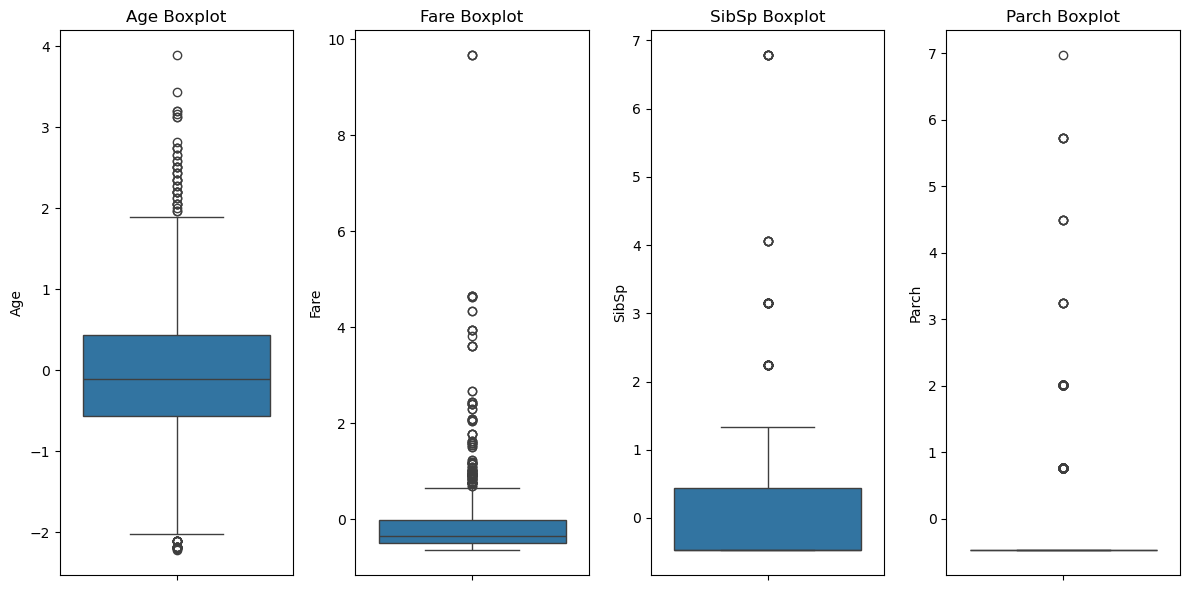

In [12]:
# Boxplots for numerical columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()

# Remove outliers using IQR
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [14]:
# Summary statistics for numerical features
print(df.describe())

# Median separately (not included in describe())
print("\nMedian Values:")
print(df.median(numeric_only=True))

       PassengerId    Survived      Pclass         Sex         Age  \
count   577.000000  577.000000  577.000000  577.000000  577.000000   
mean    450.590988    0.299827    2.502600    0.247834   -0.004480   
std     259.568357    0.458579    0.733909    0.432129    0.657194   
min       1.000000    0.000000    1.000000    0.000000   -1.872184   
25%     222.000000    0.000000    2.000000    0.000000   -0.412037   
50%     455.000000    0.000000    3.000000    0.000000   -0.104637   
75%     676.000000    1.000000    3.000000    0.000000    0.241187   
max     891.000000    1.000000    3.000000    1.000000    1.893459   

            SibSp         Parch        Fare  
count  577.000000  5.770000e+02  577.000000  
mean    -0.293706 -4.736736e-01   -0.347884  
std      0.403796  2.777966e-16    0.253828  
min     -0.474545 -4.736736e-01   -0.648422  
25%     -0.474545 -4.736736e-01   -0.491874  
50%     -0.474545 -4.736736e-01   -0.474005  
75%     -0.474545 -4.736736e-01   -0.329287  
m

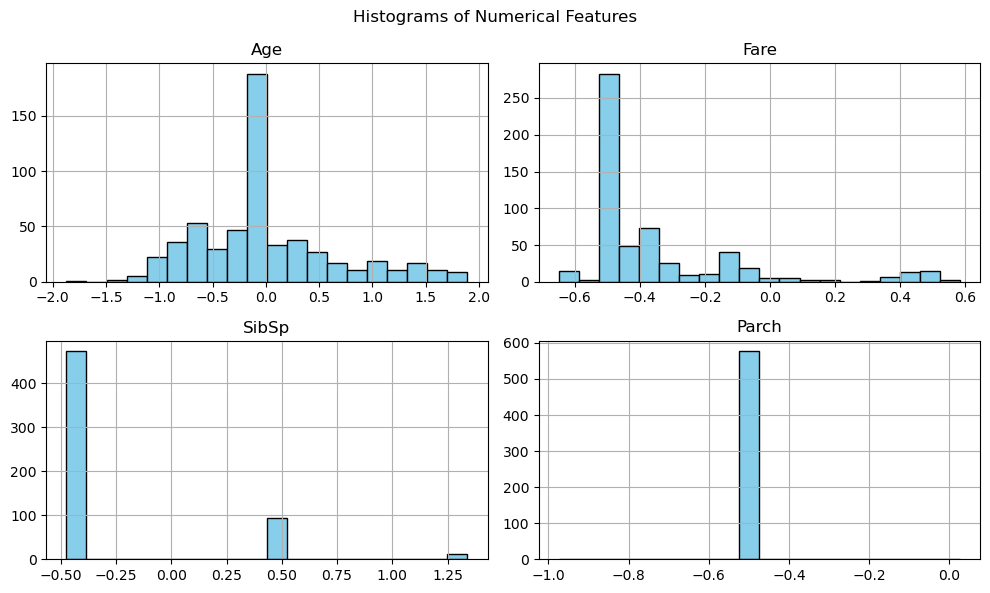

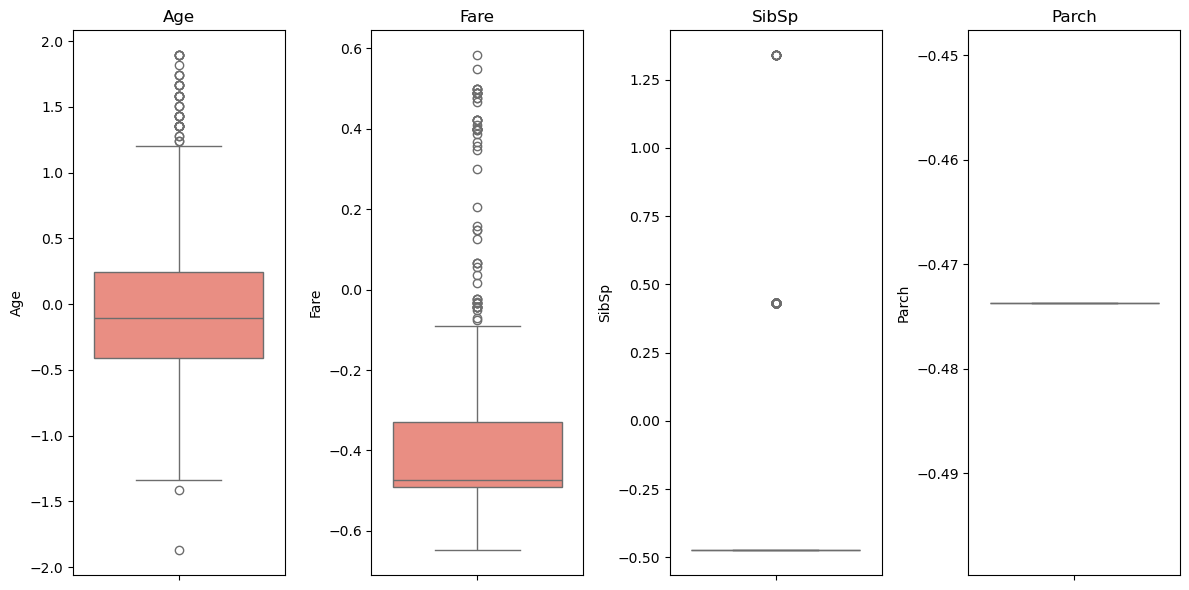

In [16]:
# List of numerical columns
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Histograms
df[num_cols].hist(figsize=(10, 6), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    sns.boxplot(y=df[col], color='salmon')
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

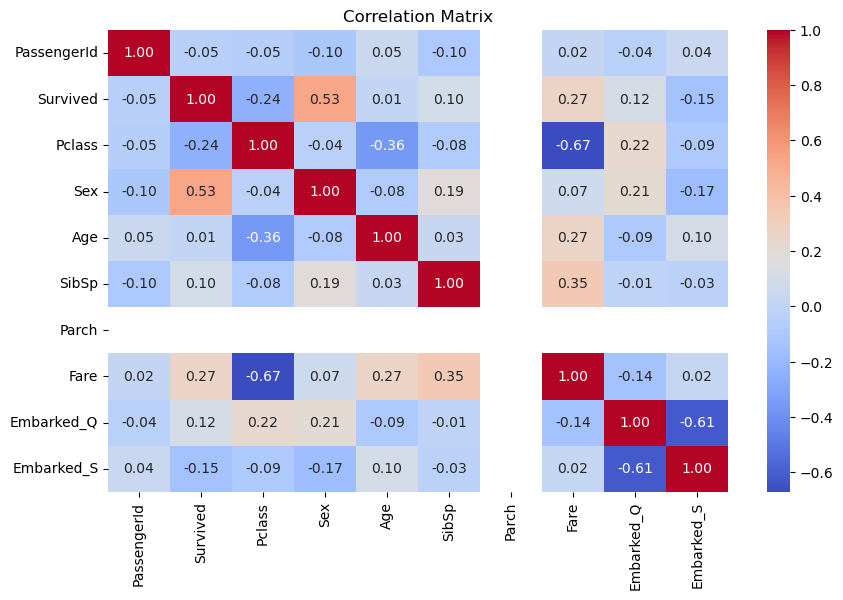

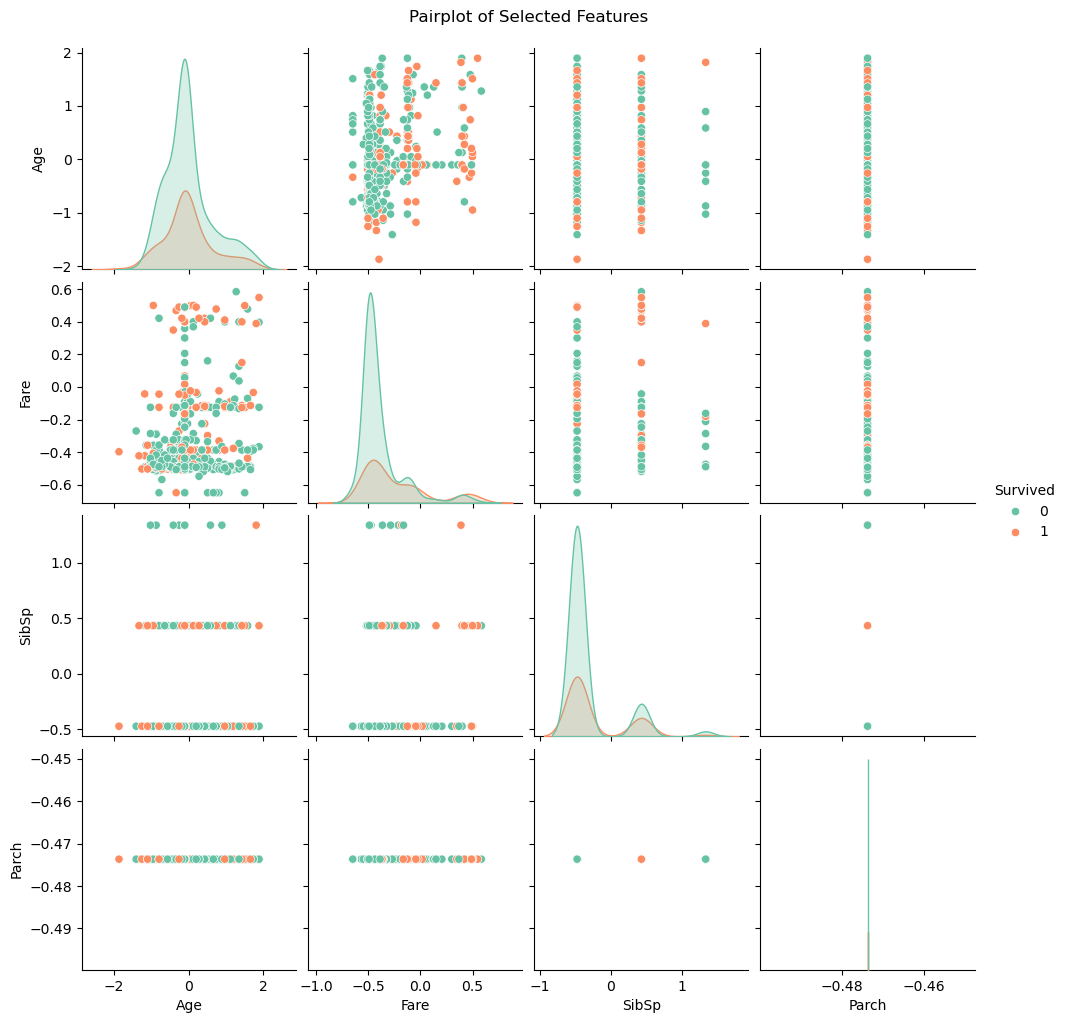

In [18]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Pairplot for visualizing relationships
sns.pairplot(df[['Survived', 'Age', 'Fare', 'SibSp', 'Parch']], hue='Survived', palette='Set2')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

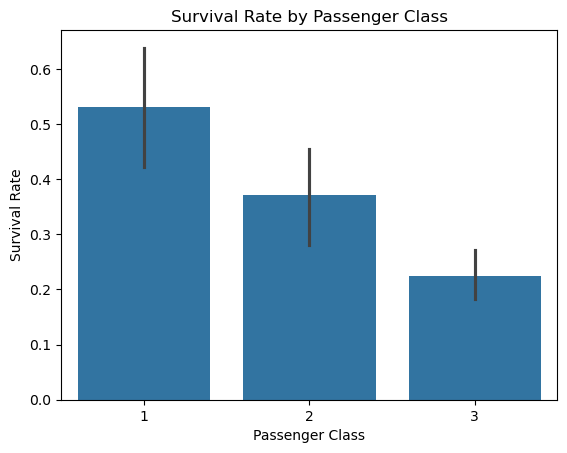

In [20]:
# Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()

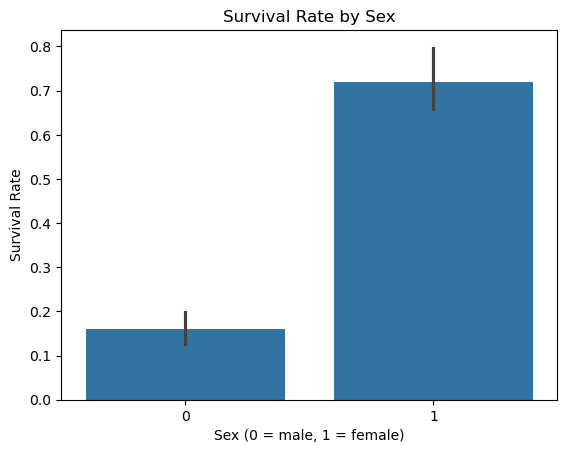

In [22]:
# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Sex (0 = male, 1 = female)')
plt.show()

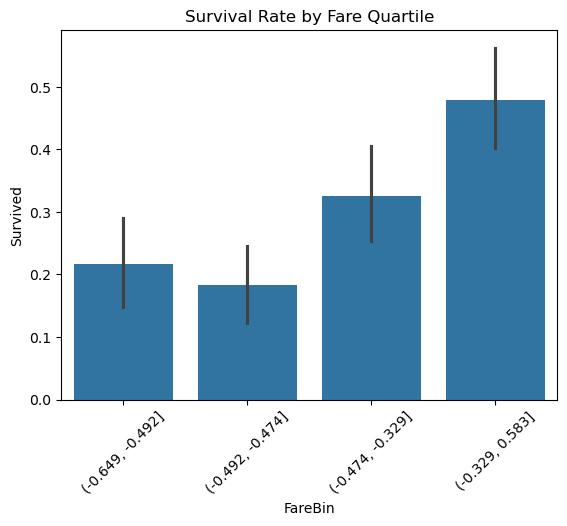

In [24]:
# Fare bins and survival rate
df['FareBin'] = pd.qcut(df['Fare'], 4)  # Divide fare into 4 quartiles
sns.barplot(x='FareBin', y='Survived', data=df)
plt.xticks(rotation=45)
plt.title('Survival Rate by Fare Quartile')
plt.show()

# Drop FareBin afterward if you don't need it
df.drop('FareBin', axis=1, inplace=True)

SibSp
-0.474545    0.274841
 0.432793    0.430108
 1.340132    0.272727
Name: Survived, dtype: float64


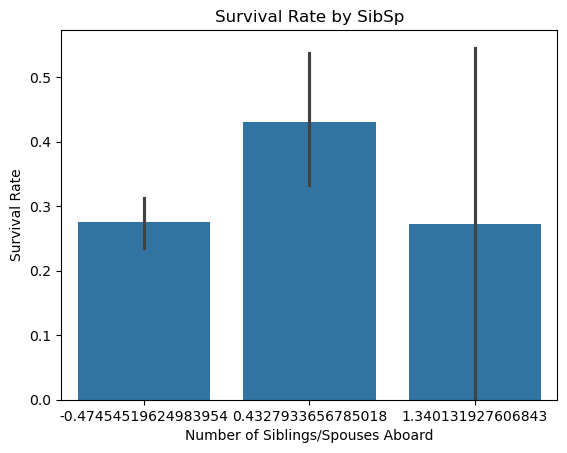

In [26]:
 # Grouping survival by number of siblings/spouses
print(df.groupby('SibSp')['Survived'].mean())

sns.barplot(x='SibSp', y='Survived', data=df)
plt.title('Survival Rate by SibSp')
plt.ylabel('Survival Rate')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.show()

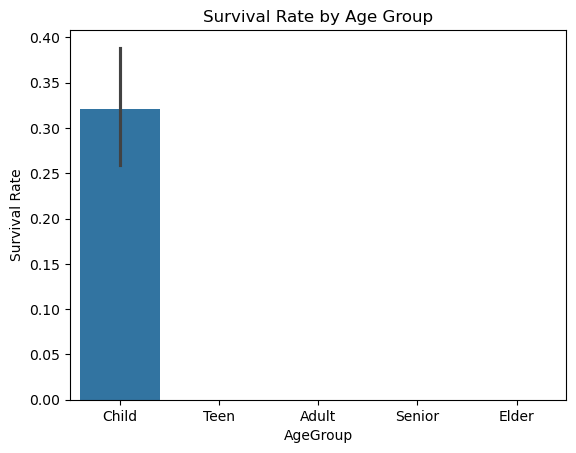

In [28]:
# Create age bins
df['AgeGroup'] = pd.cut(df['Age'], bins=[-1, 0, 12, 18, 35, 60, np.inf], 
                        labels=['Missing', 'Child', 'Teen', 'Adult', 'Senior', 'Elder'])

sns.barplot(x='AgeGroup', y='Survived', data=df, order=['Child', 'Teen', 'Adult', 'Senior', 'Elder'])
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.show()

# Drop AgeGroup if not needed later
df.drop('AgeGroup', axis=1, inplace=True)

In [30]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('Survived', axis=1)  # All features except target
y = df['Survived']               # Target variable

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression

# Initialize and fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation
print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Model Evaluation:
Mean Absolute Error (MAE): 0.2615
Mean Squared Error (MSE): 0.1243
R² Score: 0.3370


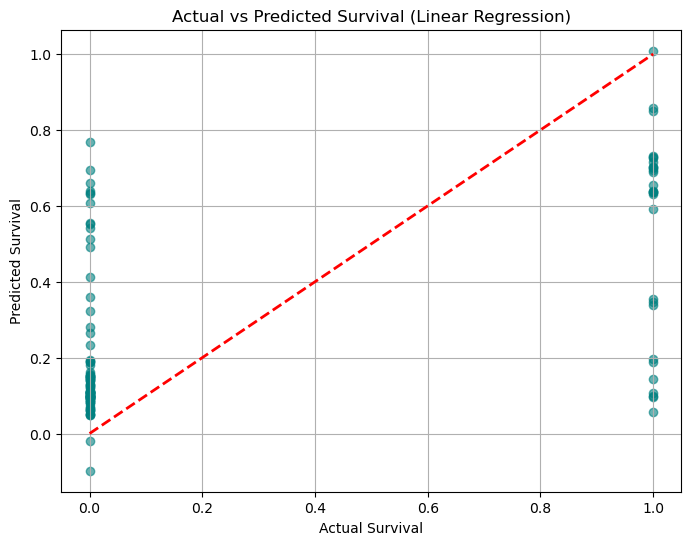

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([0, 1], [0, 1], '--r', linewidth=2)
plt.xlabel("Actual Survival")
plt.ylabel("Predicted Survival")
plt.title("Actual vs Predicted Survival (Linear Regression)")
plt.grid(True)
plt.show()

In [38]:
# Create DataFrame for coefficients
coeff_df = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
print("Linear Regression Coefficients:")
print(coeff_df)

Linear Regression Coefficients:
              Coefficient
PassengerId -8.324739e-06
Pclass      -5.445121e-02
Sex          5.376584e-01
Age         -2.109604e-02
SibSp       -1.221521e-01
Parch        4.996004e-16
Fare         4.235872e-01
Embarked_Q  -6.390681e-03
Embarked_S  -5.822007e-02
